<a href="https://colab.research.google.com/github/samuelhenrick1/GoogleCollab/blob/main/Trilha_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
bovespa = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

display(bovespa.shape)
display(bovespa.head())
display(bovespa.tail())
display(bovespa.Stock.value_counts())
display(bovespa.data.duplicated().sum())
display(bovespa.data.min(),bovespa.data.max())

(129, 3)

,data,Stock,value
0,2020-01-02,VALE3,13.45
1,2020-01-03,VALE3,13.29
2,2020-01-06,VALE3,13.14
3,2020-01-07,VALE3,13.23
4,2020-01-08,VALE3,13.22


,data,Stock,value
124,2020-03-03,DOLAR,4.4724
125,2020-03-04,DOLAR,4.5132
126,2020-03-05,DOLAR,4.5834
127,2020-03-06,DOLAR,4.6062
128,2020-03-09,DOLAR,4.5898


PETR4    43
DOLAR    43
VALE3    43
Name: Stock, dtype: int64

86

'2020-01-02'

'2020-03-09'

In [ ]:
{"type":"string"}

{'type': 'string'}

In [ ]:
bovespa = pd.read_csv('https://meusite.mackenzie.br/rogerio/TIC/bovespa.csv')

bovespa = pd.pivot(bovespa,columns=['Stock'], values='value', index='data').reset_index()
bovespa = bovespa.rename_axis('',axis='columns')
bovespa.head()

,data,DOLAR,PETR4,VALE3
0,2020-01-02,4.0163,16.270000,13.45
1,2020-01-03,4.0234,15.990000,13.29
2,2020-01-06,4.0570,16.219999,13.14
3,2020-01-07,4.0604,16.059999,13.23
4,2020-01-08,4.0662,15.700000,13.22


In [ ]:
IBOV = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/IBOV.csv')

display(IBOV.shape)
display(IBOV.head())
display(IBOV.data.min(),bovespa.data.max())

(43, 3)

,data,Stock,value
0,2020-01-02,IBOV,118573.0
1,2020-01-03,IBOV,117707.0
2,2020-01-06,IBOV,116878.0
3,2020-01-07,IBOV,116662.0
4,2020-01-08,IBOV,116247.0


'2020-01-02'

'2020-03-09'

In [ ]:
IBOV = IBOV.rename(columns={'value':'IBOV'})

bovespa = pd.merge(bovespa, IBOV [['data','IBOV']], on = 'data')
display(bovespa.head())

,data,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,4.0163,16.270000,13.45,118573.0
1,2020-01-03,4.0234,15.990000,13.29,117707.0
2,2020-01-06,4.0570,16.219999,13.14,116878.0
3,2020-01-07,4.0604,16.059999,13.23,116662.0
4,2020-01-08,4.0662,15.700000,13.22,116247.0


In [ ]:
display(bovespa.dtypes)
bovespa.data = pd.to_datetime(bovespa.data, format='%Y-%m-%d', errors='coerce')
display(bovespa.dtypes)

data      object
DOLAR    float64
PETR4    float64
VALE3    float64
IBOV     float64
dtype: object

data     datetime64[ns]
DOLAR           float64
PETR4           float64
VALE3           float64
IBOV            float64
dtype: object

In [ ]:
print(bovespa.isnull().sum())
print(bovespa.describe())

data     0
DOLAR    0
PETR4    0
VALE3    0
IBOV     0
dtype: int64
           DOLAR      PETR4      VALE3           IBOV
count  43.000000  43.000000  43.000000      43.000000
mean    4.265325  14.243721  12.046279  113382.767442
std     0.158326   1.675228   1.287173    6520.692382
min     4.016300   7.260000   7.970000   86067.000000
25%     4.164300  14.205000  11.790000  113765.500000
50%     4.242200  14.630000  12.050000  115528.000000
75%     4.354650  14.915000  13.190000  116689.000000
max     4.606200  16.270000  13.630000  119528.000000


In [ ]:
bovespa.index

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42],
           dtype='int64')

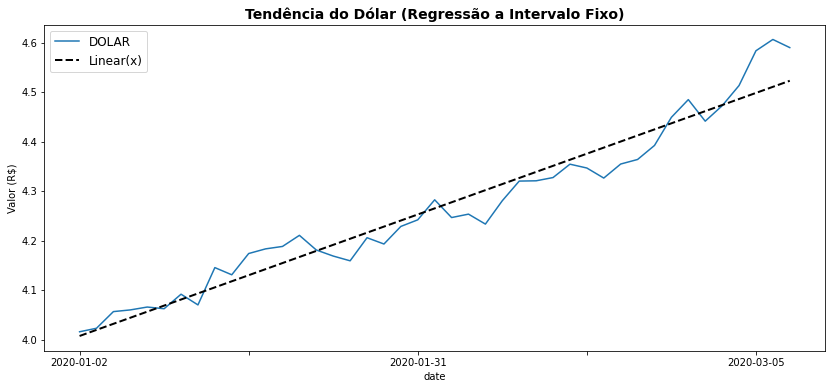

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(bovespa.index, bovespa.DOLAR, label ='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)',fontsize=14,weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(bovespa.index,bovespa.DOLAR,1)
p = np.poly1d(z)
ax.plot(bovespa.index,p(bovespa.index),linestyle='dashed',label='Linear(x)',linewidth=2,color ='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

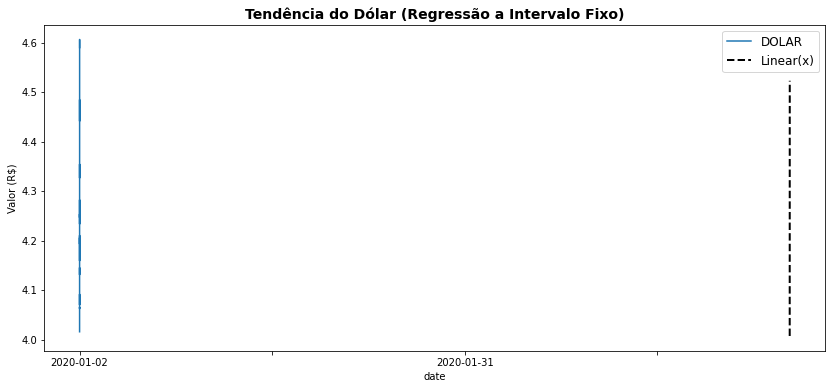

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))
ax.plot(bovespa.index, bovespa.DOLAR, label ='DOLAR')

ax.set_title('Tendência do Dólar (Regressão a Intervalo Fixo)',fontsize=14,weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")

x = np.arange(0,len(bovespa),1)
z = np.polyfit(x,bovespa.DOLAR,1)
p = np.poly1d(z)
ax.plot(bovespa.data, p(x), linestyle='dashed', label='Linear(x)', linewidth=2, color ='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',bovespa.iloc[0].data.date(),'',bovespa.iloc[20].data.date(),'',bovespa.iloc[40].data.date()])

plt.show()

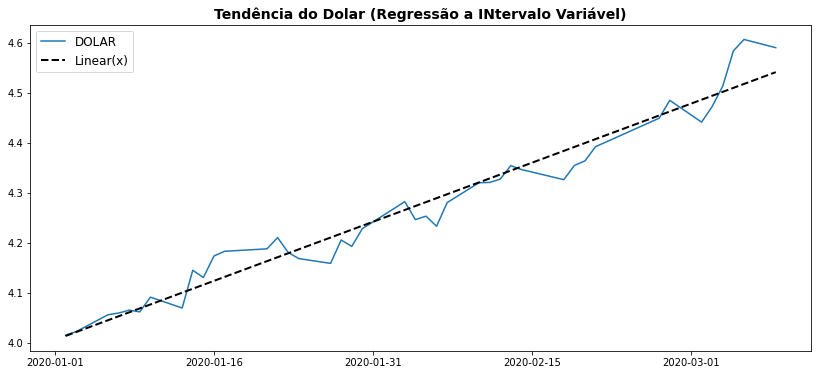

In [ ]:
bovespa['dias'] = bovespa ['data'] - bovespa ['data'].min()

fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label = 'DOLAR')

ax.set_title('Tendência do Dolar (Regressão a INtervalo Variável)', fontsize=14, weight = 'bold')
ax.set_xlabel
ax.set_ylabel

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR,1)
p = np.poly1d(z)
ax.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear(x)', linewidth=2, color ='k')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker

ax.xaxis.set_major_locator(ticker.MaxNLocator(5))

plt.show()


In [ ]:
bovespa['week'] = bovespa['data'].dt.isocalendar().week

bovespa.head()

,data,DOLAR,PETR4,VALE3,IBOV,dias,week
0,2020-01-02,4.0163,16.270000,13.45,118573.0,0 days,1
1,2020-01-03,4.0234,15.990000,13.29,117707.0,1 days,1
2,2020-01-06,4.0570,16.219999,13.14,116878.0,4 days,2
3,2020-01-07,4.0604,16.059999,13.23,116662.0,5 days,2
4,2020-01-08,4.0662,15.700000,13.22,116247.0,6 days,2


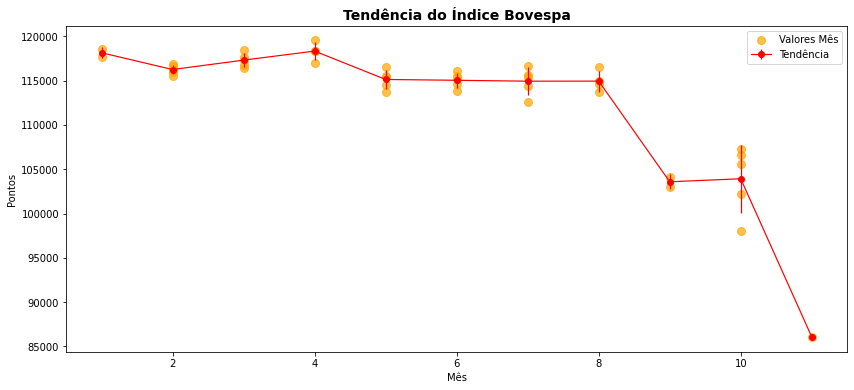

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

yerr = []
ymean = []
for w in bovespa.week.unique():
  yerr.append(bovespa[bovespa.week == w]['IBOV'].std())
  ymean.append(bovespa[bovespa.week == w]['IBOV'].mean())
yerr = np.array(yerr)
ymean = np.array(ymean)

plt.errorbar(bovespa.week.unique(), ymean, yerr = yerr, label='Tendência', marker = 'o', color ='r', linewidth=1.2)
plt.scatter(bovespa.week, bovespa.IBOV, label ='Valores Mês', marker ='o', color ='orange', alpha=0.7, s=64)

plt.title("Tendência do Índice Bovespa", fontsize=14, weight = 'bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

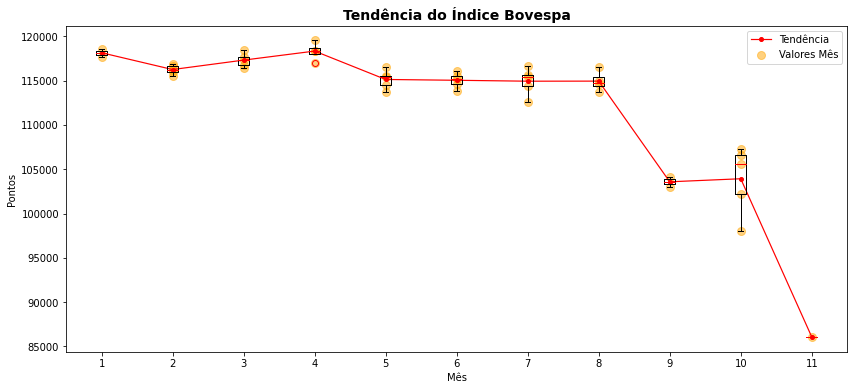

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

plt.plot(np.array(bovespa.week.unique()), ymean, 'r-', label='Tendência', marker='o', linewidth=1.2, markersize=4)
plt.scatter(bovespa.week, bovespa.IBOV, label ='Valores Mês', marker='o', alpha =0.5, s=64, color='orange')

for week in bovespa.week.unique():
  plt.boxplot(bovespa[bovespa.week == week].IBOV, positions=[week], widths=0.15, flierprops=dict(color='r', markeredgecolor='r'), medianprops=dict(color='r'))

plt.title("Tendência do Índice Bovespa", fontsize = 14, weight = 'bold')
plt.xlabel("Mês")
plt.ylabel("Pontos")
plt.legend()

plt.show()

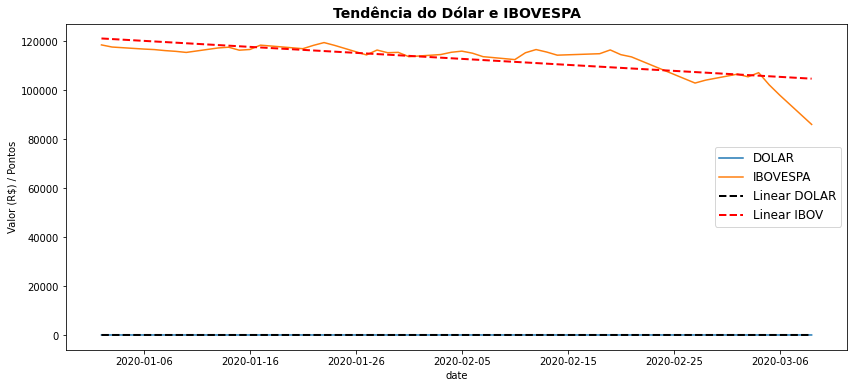

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR')
ax.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA')

ax.set_title('Tendência do Dólar e IBOVESPA', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$) / Pontos")

z = np.polyfit(bovespa.dias.dt.days,bovespa.DOLAR,1)
p = np.poly1d(z)

ax.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR', linewidth=2, color ='k')

z = np.polyfit(bovespa.dias.dt.days, bovespa.IBOV, 1)
p = np.poly1d(z)
ax.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV', linewidth=2, color ='r')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

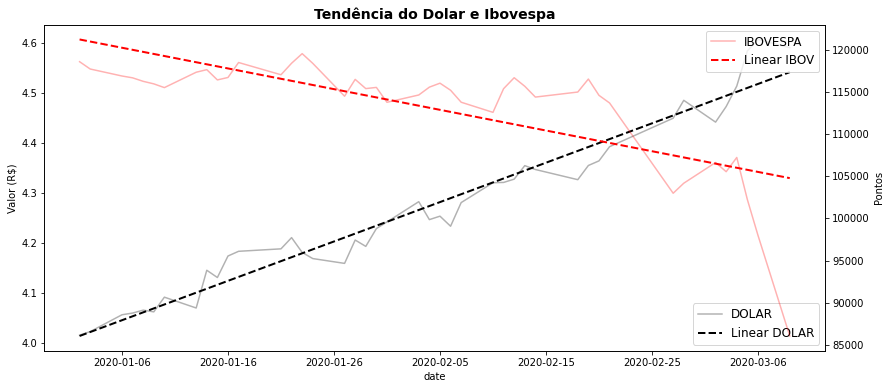

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa.data, bovespa.DOLAR, label='DOLAR', color='k', alpha=0.3)

ax2 = ax.twinx()
ax2.plot(bovespa.data, bovespa.IBOV, label='IBOVESPA', color ='r', alpha=0.3)

ax.set_title('Tendência do Dolar e Ibovespa', fontsize=14, weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Valor (R$)")
ax2.set_ylabel("Pontos")

z = np.polyfit(bovespa.dias.dt.days, bovespa.DOLAR, 1)
p = np.poly1d(z)
ax.plot(bovespa.data,p(bovespa.dias.dt.days), linestyle='dashed', label='Linear DOLAR', linewidth=2, color='k')

z = np.polyfit(bovespa.dias.dt.days, bovespa.IBOV, 1)
p = np.poly1d(z)

ax2.plot(bovespa.data, p(bovespa.dias.dt.days), linestyle='dashed', label='Linear IBOV', linewidth=2, color ='r')

ax.legend(loc='lower right', fontsize=12)
ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

In [ ]:
bovespa_norm = (bovespa.drop(columns=['data','dias','week']) - bovespa.drop(columns=['data','dias','week']).mean()) / bovespa.drop(columns=['data','dias','week']).std()
bovespa_norm = pd.concat([bovespa[['data','dias','week']], bovespa_norm],axis=1)
bovespa_norm.head()

,data,dias,week,DOLAR,PETR4,VALE3,IBOV
0,2020-01-02,0 days,1,-1.572860,1.209554,1.090545,0.795963
1,2020-01-03,1 days,1,-1.528018,1.042412,0.966242,0.663155
2,2020-01-06,4 days,2,-1.315796,1.179707,0.849708,0.536022
3,2020-01-07,5 days,2,-1.294322,1.084198,0.919628,0.502896
4,2020-01-08,6 days,2,-1.257690,0.869302,0.911860,0.439253


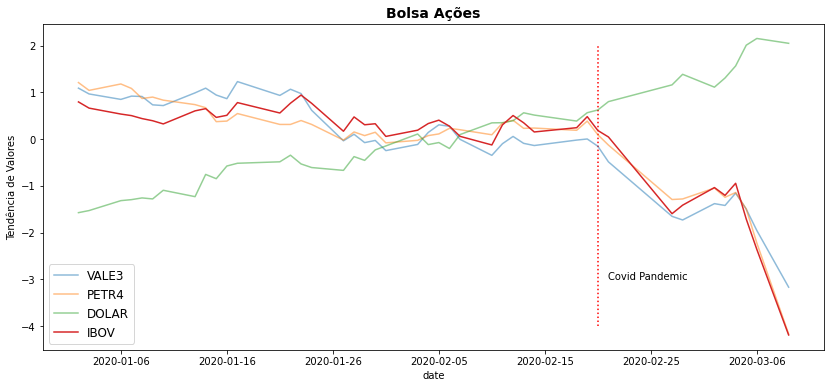

In [ ]:
fig, ax = plt.subplots(figsize=(14,6))

ax.plot(bovespa_norm.data, bovespa_norm.VALE3, label ='VALE3', alpha = 0.5)
ax.plot(bovespa_norm.data, bovespa_norm.PETR4, label ='PETR4', alpha = 0.5)
ax.plot(bovespa_norm.data, bovespa_norm.DOLAR, label ='DOLAR', alpha = 0.5)
ax.plot(bovespa_norm.data, bovespa_norm.IBOV, label ='IBOV')

ax.set_title('Bolsa Ações',fontsize=14,weight='bold')
ax.set_xlabel("date")
ax.set_ylabel("Tendência de Valores")

ax.legend(fontsize=12)

plt.vlines(np.datetime64('2020-02-20'),-4,2,color='r', linestyles=':')
plt.text(np.datetime64('2020-02-21'),-3,'Covid Pandemic')

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(8))

plt.show()

In [ ]:
wine = pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/winemag-data-130k-v2.csv')

display(wine.shape)
display(wine.head())

(129971, 14)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [ ]:
display(wine.country.value_counts()[0:10])
print('Percentual de Vinhos Nacionais: ', wine[wine.country == 'Brazil'].country.count() / len(wine))
display(wine.isnull().sum()/len(wine))

US           54504
France       22093
Italy        19540
Spain         6645
Portugal      5691
Chile         4472
Argentina     3800
Austria       3345
Australia     2329
Germany       2165
Name: country, dtype: int64

Percentual de Vinhos Nacionais:  0.00040008925067899764


Unnamed: 0               0.000000
country                  0.000485
description              0.000000
designation              0.288257
points                   0.000000
price                    0.069215
province                 0.000485
region_1                 0.163475
region_2                 0.611367
taster_name              0.201922
taster_twitter_handle    0.240154
title                    0.000000
variety                  0.000008
winery                   0.000000
dtype: float64

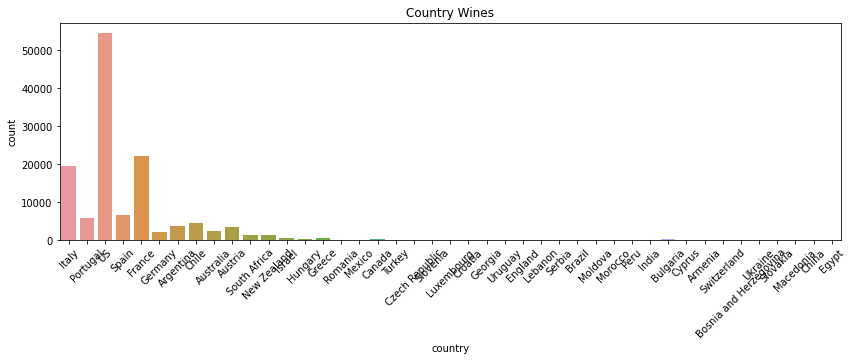

In [ ]:
plt.figure(figsize=(14,4))
sns.countplot(x=wine.country)
plt.title('Country Wines')
plt.xticks(rotation=45)
plt.show()

In [ ]:
pd.DataFrame(wine.country.value_counts()).reset_index()[23:30]

,index,country
23,Croatia,73
24,Mexico,70
25,Moldova,59
26,Brazil,52
27,Lebanon,35
28,Morocco,28
29,Peru,16


In [ ]:
wine.loc[wine.price.nlargest(5).index][['country','title','variety','price']]

,country,title,variety,price
80290,France,Château les Ormes Sorbet 2013 Médoc,Bordeaux-style Red Blend,3300.0
15840,France,Château Pétrus 2014 Pomerol,Bordeaux-style Red Blend,2500.0
98380,France,Domaine du Comte Liger-Belair 2010 La Romanée,Pinot Noir,2500.0
120391,US,Blair 2013 Roger Rose Vineyard Chardonnay (Arr...,Chardonnay,2013.0
65352,France,Château Pétrus 2011 Pomerol,Bordeaux-style Red Blend,2000.0


In [ ]:
wine.loc[wine.price.nsmallest(5).index][['country','title','variety','price']]

,country,title,variety,price
1987,Spain,Felix Solis 2013 Flirty Bird Syrah (Vino de la...,Syrah,4.0
20484,US,Dancing Coyote 2015 White (Clarksburg),White Blend,4.0
29553,Argentina,Broke Ass 2009 Red Malbec-Syrah (Mendoza),Malbec-Syrah,4.0
31530,US,Bandit NV Chardonnay (California),Chardonnay,4.0
59507,US,Pam's Cuties NV Unoaked Chardonnay (California),Chardonnay,4.0


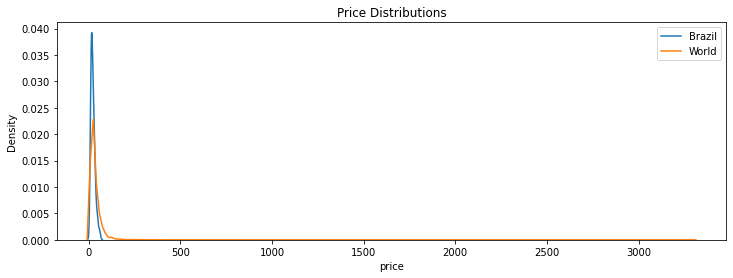

In [ ]:
plt.figure(figsize=(12,4))
sns.kdeplot(wine[wine.country == 'Brazil'].price, label='Brazil')
sns.kdeplot(wine.price, label='World')
plt.title('Price Distributions')
plt.legend()
plt.show()

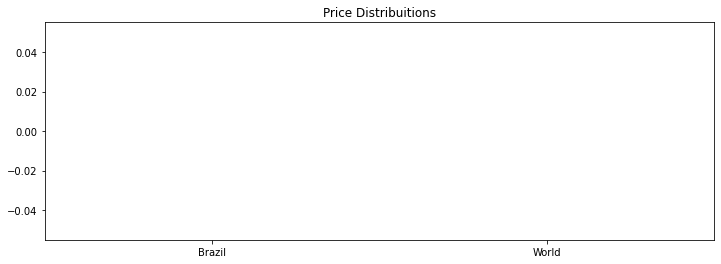

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine[wine.country =='Brazil'].price, positions=[1])
plt.boxplot(wine.price, positions=[2])
plt.title('Price Distribuitions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

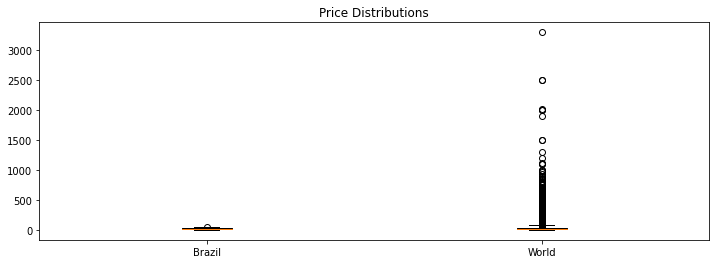

In [ ]:
wine_not_null = wine[ ~ np.isnan(wine.price)]

plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price, positions=[1])
plt.boxplot(wine_not_null.price, positions=[2])
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil', 'World'])
plt.show()

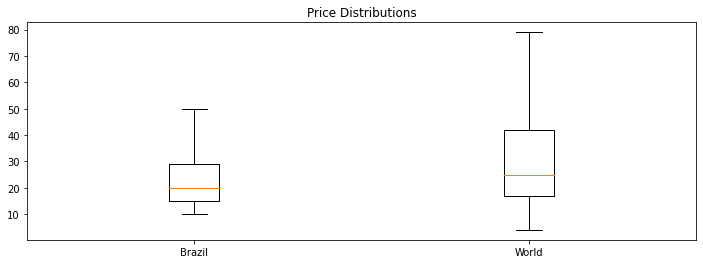

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(wine_not_null[wine_not_null.country == 'Brazil'].price, positions=[1], showfliers=False)
plt.boxplot(wine_not_null.price, positions=[2], showfliers=False)
plt.title('Price Distributions')
plt.xticks(ticks=[1,2], labels=['Brazil','World'])
plt.show()

In [ ]:
wine[wine.country == 'Brazil'].province.unique()

array(['Pinto Bandeira', 'Santa Catarina', 'Campanha', 'Serra Gaúcha',
       'Vale dos Vinhedos', 'Brazil', 'Vale Trentino', 'Serra do Sudeste'],
      dtype=object)

In [ ]:
wine[wine.country== 'Brazil'].groupby('province').province.count()

province
Brazil                7
Campanha              4
Pinto Bandeira        6
Santa Catarina        2
Serra Gaúcha         18
Serra do Sudeste      1
Vale Trentino         5
Vale dos Vinhedos     9
Name: province, dtype: int64

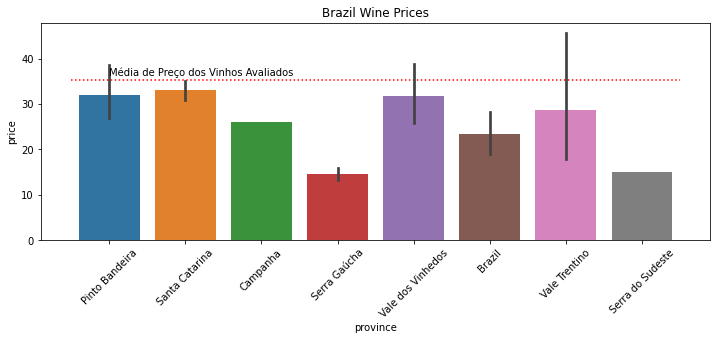

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country == 'Brazil'].province, y=wine[wine.country =='Brazil'].price)
plt.title('Brazil Wine Prices')
plt.hlines(wine.price.mean(), -0.5,7.5,color='r',linestyles=':')
plt.text(0, wine.price.mean()+1, 'Média de Preço dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.show()

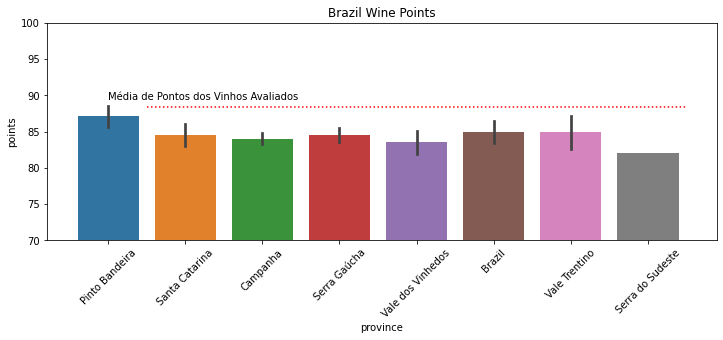

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine[wine.country =='Brazil'].province, y=wine[wine.country =='Brazil'].points)
plt.title('Brazil Wine Points')
plt.hlines(wine.points.mean(), 0.5,7.5, color='r', linestyles=':')
plt.text(0, wine.points.mean()+1, 'Média de Pontos dos Vinhos Avaliados')
plt.xticks(rotation=45)
plt.ylim([70,100])
plt.show()

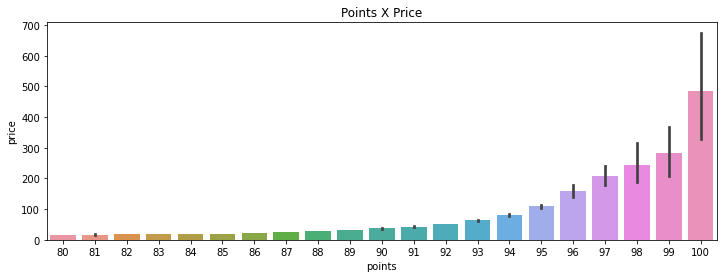

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.points, y=wine.price)
plt.title('Points X Price')
plt.show()

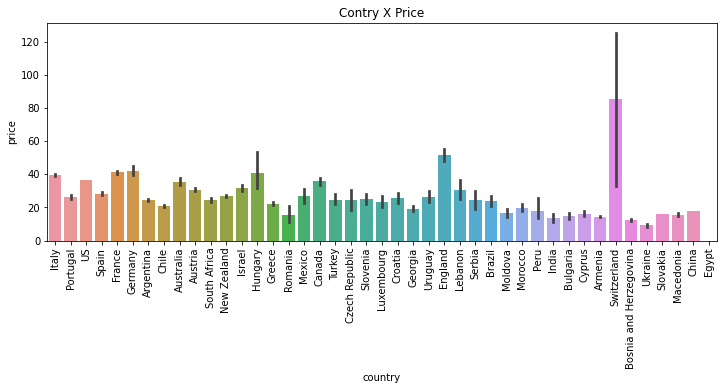

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.price)
plt.title('Contry X Price')
plt.xticks(rotation=90)
plt.show()

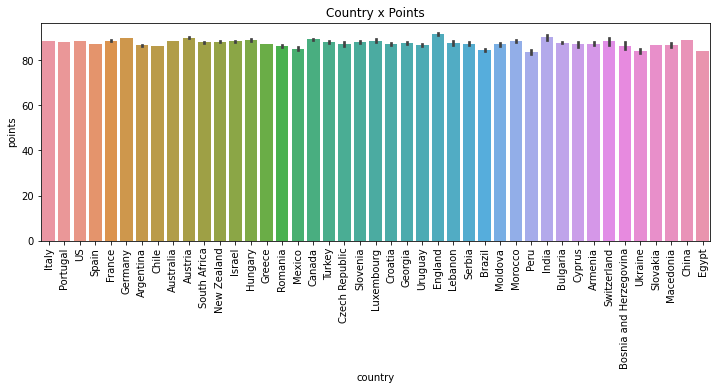

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=wine.country, y=wine.points)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.show()

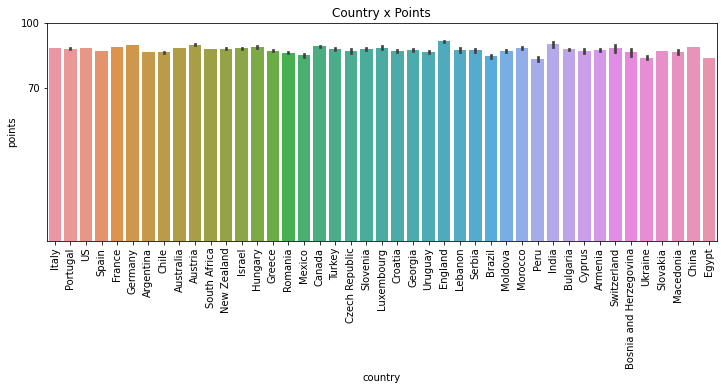

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine)
plt.title('Country x Points')
plt.xticks(rotation=90)
plt.yticks([70,100])
plt.show()

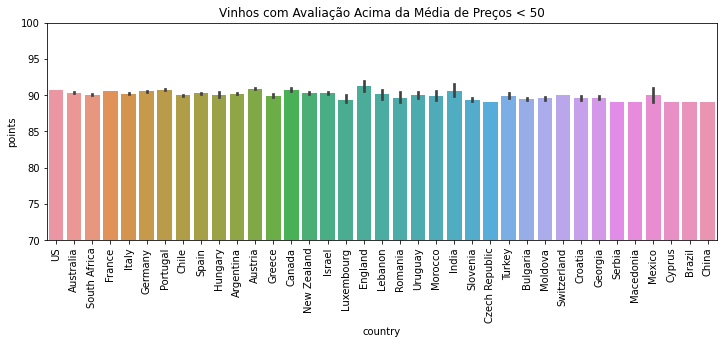

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x='country', y='points', data=wine[(wine.price < 50) & (wine.points > wine.points.mean())])
plt.title('Vinhos com Avaliação Acima da Média de Preços < 50')
plt.xticks(rotation=90)
plt.ylim([70,100])
plt.show()